<a href="https://colab.research.google.com/github/mimi778/Githubpractice/blob/main/Retale_Project_task_Two_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Who are the top 5 customers (highest total spending)?

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Step 1: Upload the file
uploaded = files.upload()
# Step 2: Load the dataset
df = pd.read_csv('retail_sales.csv')
print(df.head())





Saving retail_sales.csv to retail_sales.csv
    Order_ID  Order_Date Customer_ID Customer_Segment Product_ID  \
0  ORD000001  2024-04-12    CUST1861        Returning    PROD890   
1  ORD000002  2024-12-14    CUST7711              New    PROD423   
2  ORD000003  2024-09-27    CUST1649              New    PROD279   
3  ORD000004  2024-04-16    CUST5134              New    PROD615   
4  ORD000005  2024-03-12    CUST8587              New    PROD737   

  Product_Category Product_Name  Quantity  Unit_Price  Total_Price  \
0         Clothing  Product_511         3      281.32       843.96   
1         Clothing  Product_661         2      469.63       939.26   
2         Clothing  Product_394         4      364.76      1459.04   
3         Clothing  Product_229         4      279.98      1119.92   
4            Books  Product_992         4      387.50      1550.00   

  Payment_Method  Shipping_Cost Order_Status Shipping_Region  
0  Bank Transfer          36.33    Completed            Asia  


Missing values in each column:
Order_ID            0
Order_Date          0
Customer_ID         0
Customer_Segment    0
Product_ID          0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price          0
Total_Price         0
Payment_Method      0
Shipping_Cost       0
Order_Status        0
Shipping_Region     0
dtype: int64
0   2024-04-12
1   2024-12-14
2   2024-09-27
3   2024-04-16
4   2024-03-12
Name: Order_Date, dtype: datetime64[ns]
Order_ID                    object
Order_Date          datetime64[ns]
Customer_ID                 object
Customer_Segment          category
Product_ID                  object
Product_Category          category
Product_Name                object
Quantity                     int64
Unit_Price                 float64
Total_Price                float64
Payment_Method              object
Shipping_Cost              float64
Order_Status              category
Shipping_Region             object
dtype: object
  Customer_Segment Product_Ca

<ipython-input-23-9709f9b9a8ac>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed['Profit'] = df_completed['Total_Price'] - df_completed['Shipping_Cost']
<ipython-input-23-9709f9b9a8ac>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed['Revenue'] = df_completed['Total_Price'] - df_completed['Shipping_Cost']
<ipython-input-23-9709f9b9a8ac>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

<Axes: xlabel='Year,Month'>

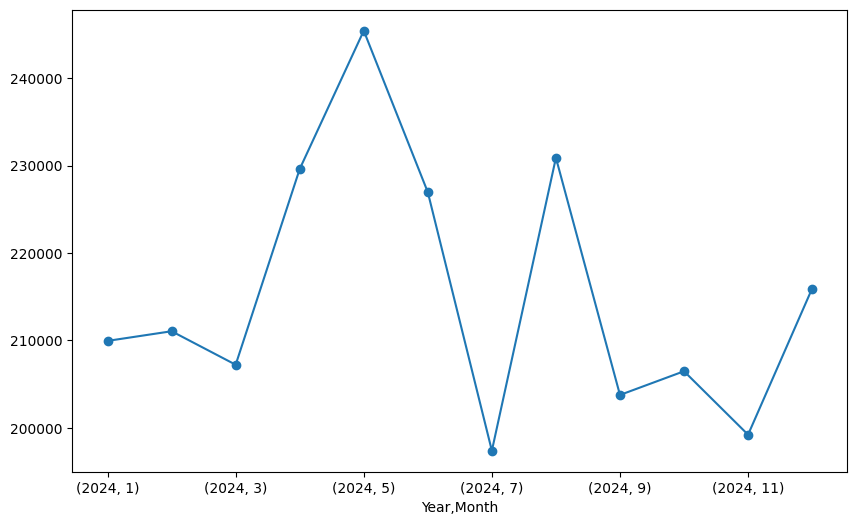

In [23]:
# Step 1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())  # Shows the number of missing values per column

# Step 2: Handle missing values

# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

df_completed = df_cleaned[df_cleaned['Order_Status']=='Completed']
df_completed.head()

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

print(df['Order_Date'].head())  # Print the first few rows to check the conversion

#Convert Customer_Segment, Product_Category, and Order_Status into categorical variables.

df['Customer_Segment'] = pd.Categorical(df['Customer_Segment'])
df['Product_Category'] = pd.Categorical(df['Product_Category'])
df['Order_Status'] = pd.Categorical(df['Order_Status'])

print(df.dtypes)
print(df[['Customer_Segment', 'Product_Category', 'Order_Status']].head())


df_completed['Profit'] = df_completed['Total_Price'] - df_completed['Shipping_Cost']

print(df_completed.head())

#Save the cleaned dataset as "retail_sales_cleaned.csv".

#df_completed.to_csv('retail_sales_cleaned.csv', index=False)

#files.download('retail_sales_cleaned.csv')

#Who are the top 5 customers (highest total spending)?

top_customers = df_completed.groupby('Customer_ID')['Total_Price'].sum().head(5)
print(top_customers)

#Which customer segment contributes the most revenue?

df_completed['Revenue'] = df_completed['Total_Price'] - df_completed['Shipping_Cost']
revenue_by_segment = df_completed.groupby('Customer_Segment')['Revenue'].sum()

top_segment = revenue_by_segment.idxmax()
top_segment_revenue = revenue_by_segment.max()

print(f"The customer segment contributing the most revenue is '{top_segment}' with a total revenue of {top_segment_revenue:.2f}")

#What is the total revenue generated in 2024?

df_completed['Order_Date'] = pd.to_datetime(df_completed['Order_Date'])

data_2024 = df_completed[df_completed['Order_Date'].dt.year == 2024]

total_revenue_2024 = data_2024['Revenue'].sum()

print(f"Total revenue generated in 2024: {total_revenue_2024:.2f}")

#Which month had the highest sales revenue? Show a sales trend over the months.

df_completed['Month'] = df_completed['Order_Date'].dt.month
df_completed['Year'] = df_completed['Order_Date'].dt.year


monthly_revenue = df_completed.groupby(['Year', 'Month'])['Revenue'].sum()

max_revenue_month = monthly_revenue.idxmax()
max_revenue_value = monthly_revenue.max()

print(f"The month with the highest sales revenue is {max_revenue_month[0]}-{max_revenue_month[1]} with a total revenue of {max_revenue_value:.2f}")
monthly_revenue.plot(kind='line', figsize=(10, 6), marker='o')


























